#**Business Problem**
The long-term goal is to develop a classifier that can predict whether a customer will default on a payment.

![churn inforgraphic](https://infographicjournal.com/wp-content/uploads/2018/02/The-Financial-Impact-of-Customer-Churn.jpg)

In [1]:
!pip install -q pycaret

# check pycaret version
import pycaret
print('PyCaret: %s' % pycaret.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 500.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.5 MB/s eta 0:00:00
   ━━━

In [2]:
!pip install -q psynlig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.9/455.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.0 MB/s eta 0:00:00


In [3]:
import csv
from psynlig import pca_explained_variance_bar
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import unique
from numpy import where
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import pyplot
import scipy.stats as ss
import math
import tensorflow as tf
import xgboost as xgb
import lightgbm as lgb

import datetime
from tqdm import tqdm

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# **Data**

#*Source*
Competition Link: https://tianchi.aliyun.com/competition/entrance/531830/information?t=1679872740340

Data File：https://drive.google.com/file/d/1cYnZw1QwRdwFvK1IMKZSL8vANsnt3RBm/view?usp=sharing

#*Data Dictionary*

In [4]:
# Read
# File: https://drive.google.com/file/d/1cYnZw1QwRdwFvK1IMKZSL8vANsnt3RBm/view?usp=share_link
url = 'https://drive.google.com/uc?id=1cYnZw1QwRdwFvK1IMKZSL8vANsnt3RBm'

# Read in the dataset
df = pd.read_csv(url, header = 0)

In [5]:
df

id  loanAmnt  term  interestRate  installment grade subGrade  \
0            0     42000     5     21.674228   927.134668     E       E2   
1            1     23000     5     15.036774   502.313142     D       D2   
2            2     18000     5     17.850663   273.198985     D       D3   
3            3     12000     3      7.400815   318.462279     A       A4   
4            4      5000     3     15.688492    94.662335     C       C2   
...        ...       ...   ...           ...          ...   ...      ...   
799995  799995     26000     3     14.634214  1000.861120     C       C4   
799996  799996     22000     3      7.103320   535.070316     A       A4   
799997  799997      9000     3     12.471062   191.330483     C       C3   
799998  799998     21000     3      6.091765   568.563764     A       A4   
799999  799999     13000     3     12.513125   263.489194     B       B3   

        employmentTitle  annualIncome  isDefault  purpose        dti  \
0                 320.0      111000.0          1        1  12.561763   
1              219843.0       52000.0          0        0  28.313509   
2               31698.0       77000.0          0        0  24.416141   
3               46854.0      119000.0          0        4  19.105931   
4                  54.0       35000.0          0       10  34.280791   
...                 ...           ...        ...      ...        ...   
799995           2659.0       76000.0          0        0  23.089648   
799996          29205.0      102000.0          0        4  15.541106   
799997           2582.0       67000.0          1        0  11.602060   
799998            151.0       98000.0          0        4  30.317779   
799999             13.0      121000.0          0        4   8.628634   

        ficoRangeLow  openAcc  revolBal  totalAcc earliesCreditLine    title  \
0                728        8     24179        28             1-Aug      1.0   
1                699       14     15101        20             2-May   1723.0   
2                673       12      4610        29             6-May      0.0   
3                682       10      9955        30            May-99      4.0   
4                689       13      2944        29            Aug-77     11.0   
...              ...      ...       ...       ...               ...      ...   
799995           708       15      9938        16            11-Aug      0.0   
799996           717        8     20478        45            May-89  33369.0   
799997           668        6      6382        39             2-Jul      0.0   
799998           673       17     69707        38            Jan-94      4.0   
799999           692        8      8421        14             2-Feb      4.0   

        policyCode  
0                1  
1                1  
2                1  
3                1  
4                1  
...            ...  
799995           1  
799996           1  
799997           1  
799998           1  
799999           1  

[800000 rows x 19 columns]

In [6]:
df.shape

(800000, 19)

In [7]:
df.head(20)

id  loanAmnt  term  interestRate  installment grade subGrade  \
0    0     42000     5     21.674228   927.134668     E       E2   
1    1     23000     5     15.036774   502.313142     D       D2   
2    2     18000     5     17.850663   273.198985     D       D3   
3    3     12000     3      7.400815   318.462279     A       A4   
4    4      5000     3     15.688492    94.662335     C       C2   
5    5     16000     3      7.524079   376.954583     A       A5   
6    6      8000     3      8.555855    61.865542     A       A4   
7    7     17000     3     14.857497   343.954422     C       C3   
8    8     16000     3     13.162382   408.527736     C       C2   
9    9     13000     3     11.903805   232.853197     B       B4   
10  10      7000     3     13.578768   190.608327     B       B5   
11  11      9000     3     27.254969   224.864734     E       E5   
12  12     23000     3     19.747625   705.769916     D       D4   
13  13     25000     3      8.924628   700.902475     B       B3   
14  14     18000     3      6.955738   574.999157     A       A5   
15  15     11000     3     11.381865   219.545569     B       B2   
16  16     12000     5     13.717979   267.156071     D       D1   
17  17      6000     3     10.849087   164.078069     B       B4   
18  18      7000     3     21.656880   241.008574     E       E2   
19  19     22000     5     20.508343   525.235901     E       E1   

    employmentTitle  annualIncome  isDefault  purpose        dti  \
0             320.0      111000.0          1        1  12.561763   
1          219843.0       52000.0          0        0  28.313509   
2           31698.0       77000.0          0        0  24.416141   
3           46854.0      119000.0          0        4  19.105931   
4              54.0       35000.0          0       10  34.280791   
5           51727.0       40000.0          0        9  14.345830   
6          180083.0       36000.0          0        0  16.314634   
7          214017.0       36000.0          0        0  28.340853   
8             188.0       66000.0          1        0  14.164137   
9              54.0       16300.0          0        0  21.048927   
10          46631.0       41000.0          0        4  16.069903   
11         140759.0       98000.0          0        0  37.074975   
12         139297.0       91000.0          0        0   6.636802   
13           4967.0      152000.0          0        2   5.173324   
14          11037.0       57000.0          0        4  42.429258   
15         251530.0       84000.0          0        2  18.274869   
16         199961.0       59000.0          0        2  23.688376   
17          81579.0       52000.0          1        4  19.779582   
18         323019.0       46000.0          1        3  30.815584   
19         258238.0       95000.0          0        0  13.683454   

    ficoRangeLow  openAcc  revolBal  totalAcc earliesCreditLine    title  \
0            728        8     24179        28             1-Aug      1.0   
1            699       14     15101        20             2-May   1723.0   
2            673       12      4610        29             6-May      0.0   
3            682       10      9955        30            May-99      4.0   
4            689       13      2944        29            Aug-77     11.0   
5            728       20      4050        54            Jul-98     10.0   
6            754       13      3112        26             6-Oct      0.0   
7            662        9     14024        34            Dec-94      0.0   
8            688       16     27180        23            Apr-94      0.0   
9            722        8      2940        65            Jan-93      0.0   
10           662       14      8656        18            Nov-96  27332.0   
11           709       11     16347        41             7-Aug      0.0   
12           678       13     18870        17            14-Feb      0.0   
13           689        8      4335        27            Oct-83      5.0   
14    

In [8]:
#checking dups
df.drop_duplicates(keep=False, inplace=True)
duplicates_count = df.duplicated().sum()
print('No. of dups:',duplicates_count)

No. of dups: 0


In [9]:
#checking missing values
print('Number of missing Values by Feature\n',df.isnull().sum())
columns_with_NaNs = []
for col in df.columns:
  if df[col].isnull().sum() > 0:
    columns_with_NaNs.append(col)
print('Columns with NaNs:',columns_with_NaNs)



Number of missing Values by Feature
 id                     0
loanAmnt               0
term                   0
interestRate           0
installment            0
grade                  0
subGrade               0
employmentTitle        1
annualIncome           0
isDefault              0
purpose                0
dti                  239
ficoRangeLow           0
openAcc                0
revolBal               0
totalAcc               0
earliesCreditLine      0
title                  1
policyCode             0
dtype: int64
Columns with NaNs: ['employmentTitle', 'dti', 'title']


In [10]:
#Autofilling
#df['dti'] = df['dti'].fillna(df['dti'].median())
#df['title'] = df['title'].fillna(df['title'].mode())
#df['employmentTitle'] = df['employmentTitle'].fillna(df['employmentTitle'].mode())

df=df.fillna({"title":df.title.median(),"employmentTitle":df.employmentTitle.median(),
                 "dti":df.dti.median()})

In [11]:
#checking missing values2
print('Number of missing Values by Feature\n',df.isnull().sum())
columns_with_NaNs = []
for col in df.columns:
  if df[col].isnull().sum() > 0:
    columns_with_NaNs.append(col)
print('Columns with NaNs:',columns_with_NaNs)

Number of missing Values by Feature
 id                   0
loanAmnt             0
term                 0
interestRate         0
installment          0
grade                0
subGrade             0
employmentTitle      0
annualIncome         0
isDefault            0
purpose              0
dti                  0
ficoRangeLow         0
openAcc              0
revolBal             0
totalAcc             0
earliesCreditLine    0
title                0
policyCode           0
dtype: int64
Columns with NaNs: []


In [12]:
#checking dups2
df.drop_duplicates(keep=False, inplace=True)
duplicates_count = df.duplicated().sum()
print('No. of dups:',duplicates_count)

No. of dups: 0


In [13]:
df.nunique()

id                   800000
loanAmnt                 47
term                      2
interestRate         799864
installment          799954
grade                     7
subGrade                 35
employmentTitle      248683
annualIncome          48493
isDefault                 2
purpose                  14
dti                  799171
ficoRangeLow            115
openAcc                  75
revolBal              71161
totalAcc                138
earliesCreditLine       720
title                 39644
policyCode                1
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 800000 non-null  int64  
 1   loanAmnt           800000 non-null  int64  
 2   term               800000 non-null  int64  
 3   interestRate       800000 non-null  float64
 4   installment        800000 non-null  float64
 5   grade              800000 non-null  object 
 6   subGrade           800000 non-null  object 
 7   employmentTitle    800000 non-null  float64
 8   annualIncome       800000 non-null  float64
 9   isDefault          800000 non-null  int64  
 10  purpose            800000 non-null  int64  
 11  dti                800000 non-null  float64
 12  ficoRangeLow       800000 non-null  int64  
 13  openAcc            800000 non-null  int64  
 14  revolBal           800000 non-null  int64  
 15  totalAcc           800000 non-null  int64  
 16  ea

In [15]:
#split data set into numerical and categorical
numerical_features = list(df.select_dtypes(exclude=['object']).columns)
categorical_features = list(filter(lambda x: x not in numerical_features,list(df.columns)))

In [16]:
numerical_features

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'isDefault',
 'purpose',
 'dti',
 'ficoRangeLow',
 'openAcc',
 'revolBal',
 'totalAcc',
 'title',
 'policyCode']

In [17]:
categorical_features

['grade', 'subGrade', 'earliesCreditLine']

In [18]:
df['isDefault'].value_counts()

isDefault
0    640390
1    159610
Name: count, dtype: int64

***Encoding***

In [19]:

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'earliesCreditLine'.
df['earliesCreditLine']= label_encoder.fit_transform(df['earliesCreditLine'])
df['employmentTitle']= label_encoder.fit_transform(df['employmentTitle'])
df['title']= label_encoder.fit_transform(df['title'])
df['term']= label_encoder.fit_transform(df['term'])

In [20]:
for data in [df]:
    df['grade'] = df['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [21]:
df.nunique()

id                   800000
loanAmnt                 47
term                      2
interestRate         799864
installment          799954
grade                     7
subGrade                 35
employmentTitle      248683
annualIncome          48493
isDefault                 2
purpose                  14
dti                  799171
ficoRangeLow            115
openAcc                  75
revolBal              71161
totalAcc                138
earliesCreditLine       720
title                 39644
policyCode                1
dtype: int64

In [22]:

df=df.drop(columns=['id', 'purpose','policyCode','subGrade'])

In [23]:
df['earliesCreditLine']=df['earliesCreditLine'].astype(np.int64)
df['title']=df['title'].astype(np.int64)
df['employmentTitle']=df['employmentTitle'].astype(np.int64)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loanAmnt           800000 non-null  int64  
 1   term               800000 non-null  int64  
 2   interestRate       800000 non-null  float64
 3   installment        800000 non-null  float64
 4   grade              800000 non-null  int64  
 5   employmentTitle    800000 non-null  int64  
 6   annualIncome       800000 non-null  float64
 7   isDefault          800000 non-null  int64  
 8   dti                800000 non-null  float64
 9   ficoRangeLow       800000 non-null  int64  
 10  openAcc            800000 non-null  int64  
 11  revolBal           800000 non-null  int64  
 12  totalAcc           800000 non-null  int64  
 13  earliesCreditLine  800000 non-null  int64  
 14  title              800000 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 91.6 MB


In [25]:
df.nunique()

loanAmnt                 47
term                      2
interestRate         799864
installment          799954
grade                     7
employmentTitle      248683
annualIncome          48493
isDefault                 2
dti                  799171
ficoRangeLow            115
openAcc                  75
revolBal              71161
totalAcc                138
earliesCreditLine       720
title                 39644
dtype: int64

**Skewness**

In [26]:
numerical_features1 = list(df.select_dtypes(exclude=['object']).columns)
numerical_features1=['loanAmnt',
 'term',
 'interestRate',
 'installment',
 'grade',
 'employmentTitle',
 'annualIncome',
 'dti',
 'ficoRangeLow',
 'openAcc',
 'revolBal',
 'totalAcc',
 'earliesCreditLine',
 'title']

In [27]:
df[numerical_features1].skew()


loanAmnt              0.722094
term                  1.208780
interestRate          0.792145
installment           1.075168
grade                 0.638852
employmentTitle       1.307603
annualIncome         46.129476
dti                  25.718376
ficoRangeLow          1.281064
openAcc               1.298413
revolBal             15.924688
totalAcc              0.949963
earliesCreditLine     0.508720
title                 5.122313
dtype: float64

In [28]:
df['isDefault'].skew()

1.503816646153084

In [29]:
# Code for skewness correction (see source below)
# Depending upon the characteritics of a feature (column), a log, Box-Cox or power transform is applied to normalize the distribution

# -*- coding: utf-8 -*-
"""
Created on Sat Feb 23 14:42:46 2019
@author: DATAmadness
"""

##################################################
# A function that will accept a pandas dataframe
# and auto-transforms columns that exceeds threshold value
#  -  Offers choice between boxcox or log / exponential transformation
#  -  Automatically handles negative values
#  -  Auto recognizes positive /negative skewness

# Further documentation available here:
# https://datamadness.github.io/Skewness_Auto_Transform

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):

    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')

    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series


    #Go through desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True

        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            #ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1 = sns.histplot(DF[col], ax=axes[0], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
            ax1.set(xlabel='Original ' + str(col))

        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])

            if exp:
               #Apply log transformation
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()

        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])

            if exp:
               #Apply exp transformation
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()

        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew

        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                #ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2 = sns.histplot(DF[col], ax=axes[1], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='Transformed ' + str(col))
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                #ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2 = sns.histplot(DF[col], ax=axes[1], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='NO TRANSFORM ' + str(col))
                plt.show()


    return DF


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'loanAmnt' . Skewness = 0.72


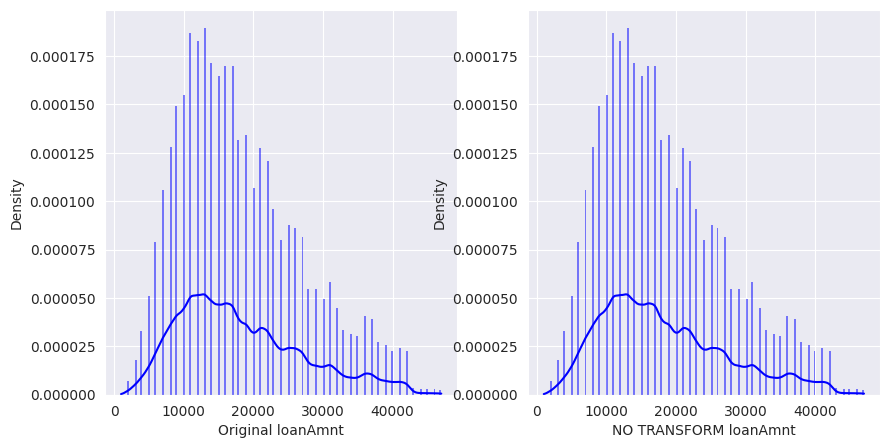


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'interestRate' . Skewness = 0.79


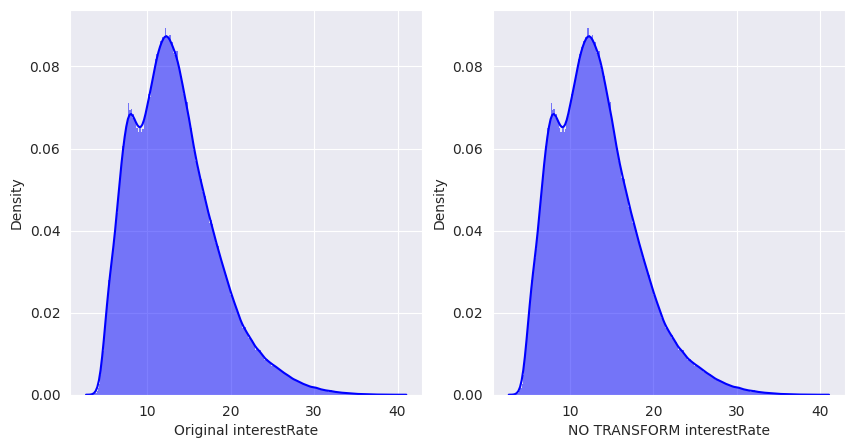


 ------------------------------------------------------

 'installment' had 'positive' skewness of 1.08

 Transformation yielded skewness of -0.01


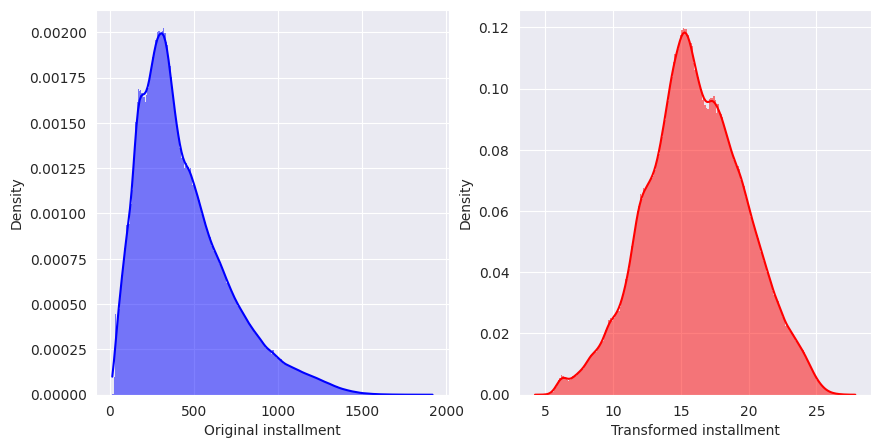


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'grade' . Skewness = 0.64


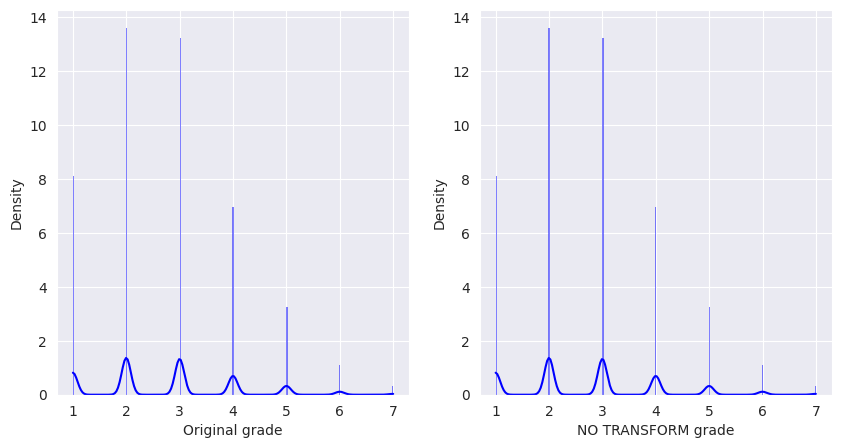


 ------------------------------------------------------

 'employmentTitle' had 'positive' skewness of 1.31

 Transformation yielded skewness of -0.11


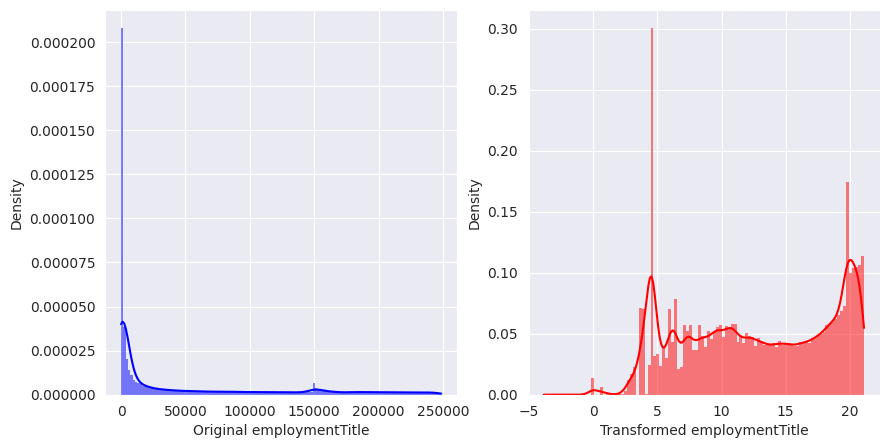


 ------------------------------------------------------

 'annualIncome' had 'positive' skewness of 46.13

 Transformation yielded skewness of -0.03


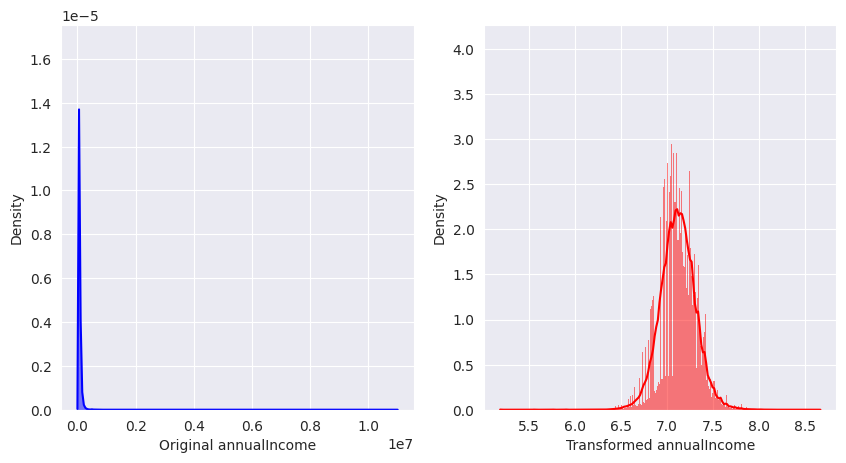


 ------------------------------------------------------

 'dti' had 'positive' skewness of 25.72

 Transformation yielded skewness of 0.25


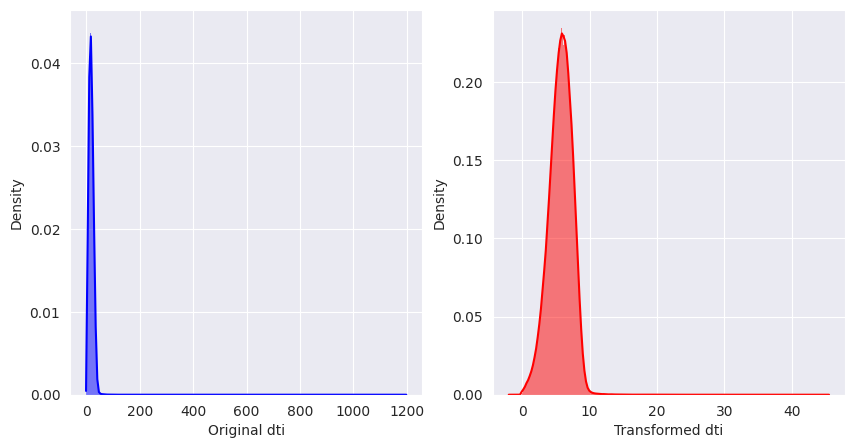


 ------------------------------------------------------

 'ficoRangeLow' had 'positive' skewness of 1.28

 Transformation yielded skewness of 0.00


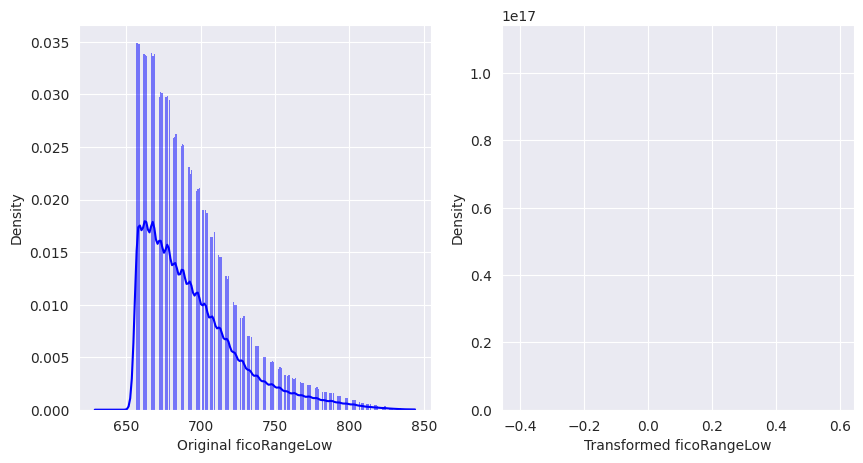


 ------------------------------------------------------

 'openAcc' had 'positive' skewness of 1.30

 Transformation yielded skewness of 0.00


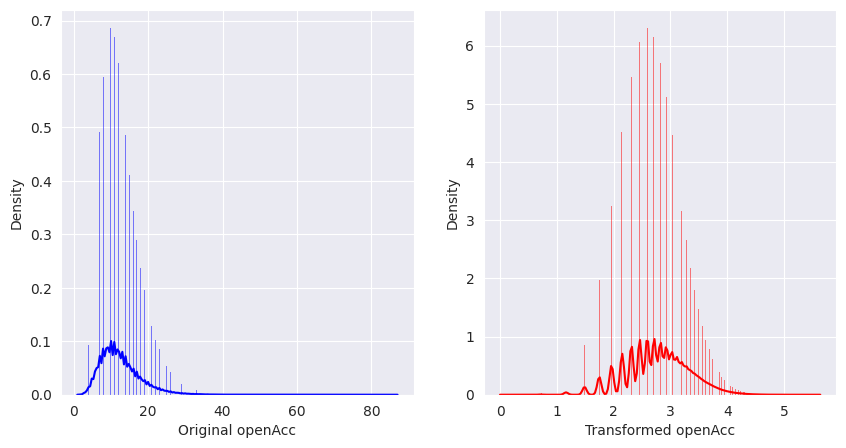


 ------------------------------------------------------

 'revolBal' had 'positive' skewness of 15.92

 Transformation yielded skewness of 0.18


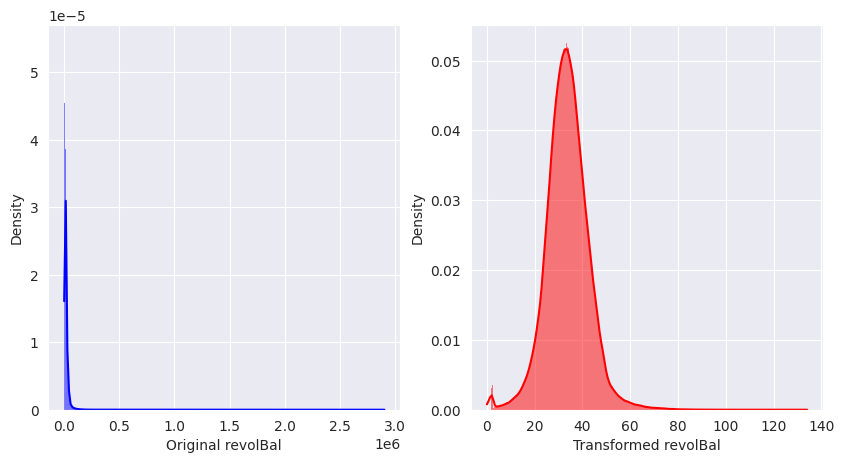


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'totalAcc' . Skewness = 0.95


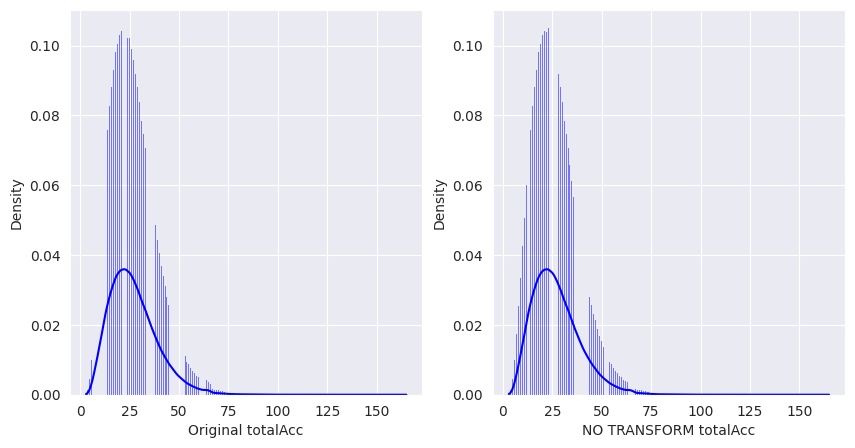


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'earliesCreditLine' . Skewness = 0.51


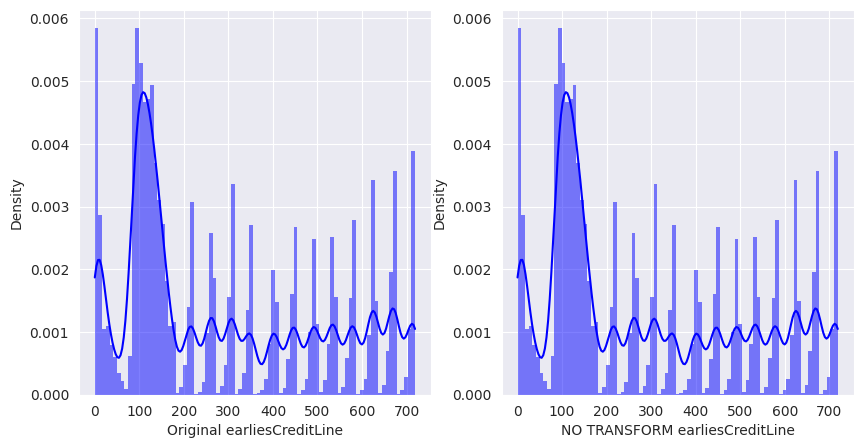


 ------------------------------------------------------

 'title' had 'positive' skewness of 5.12

 Transformation yielded skewness of 0.23


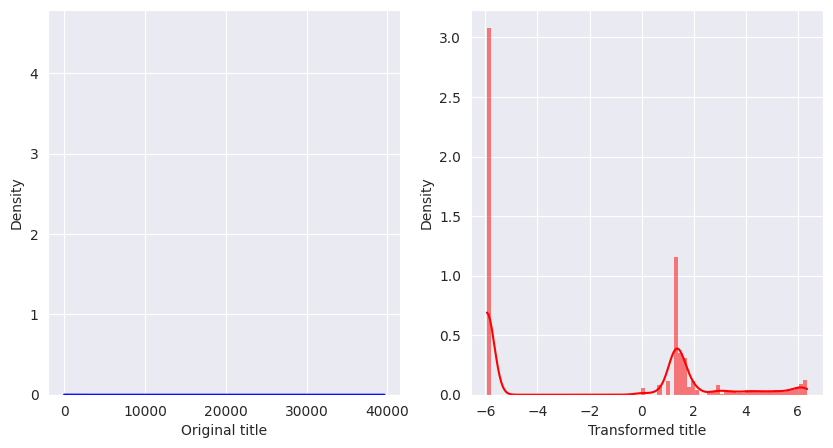

In [30]:
df = skew_autotransform(df.copy(deep=True), include=['loanAmnt',
 'interestRate',
 'installment',
 'grade',
 'employmentTitle',
 'annualIncome',
 'dti',
 'ficoRangeLow',
 'openAcc',
 'revolBal',
 'totalAcc',
 'earliesCreditLine',
 'title'], plot = True, exp = False, threshold = 1)

In [31]:
df[numerical_features1].skew()

loanAmnt             0.722094
term                 1.208780
interestRate         0.792145
installment         -0.013561
grade                0.638852
employmentTitle     -0.105282
annualIncome        -0.025863
dti                  0.245650
ficoRangeLow         0.000000
openAcc              0.001636
revolBal             0.178417
totalAcc             0.949963
earliesCreditLine    0.508720
title                0.233838
dtype: float64

In [32]:
df['isDefault'].skew()

1.503816646153084

***Outliers***

In [33]:
numerical_features2=['loanAmnt',
 'interestRate',
 'installment',
 'grade',
 'employmentTitle',
 'annualIncome',
 'dti',
 'ficoRangeLow',
 'openAcc',
 'revolBal',
 'totalAcc',
 'earliesCreditLine',
 'title']

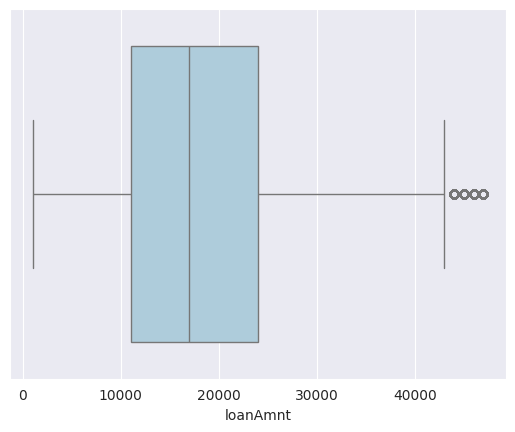

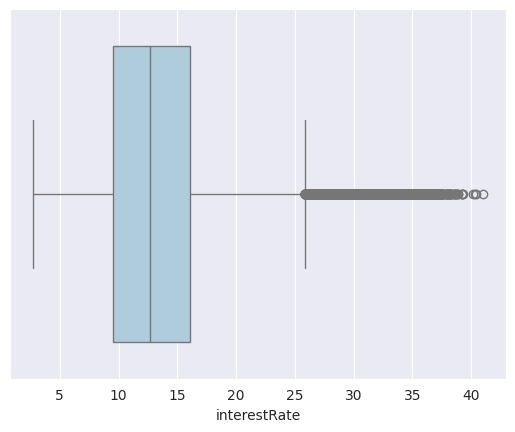

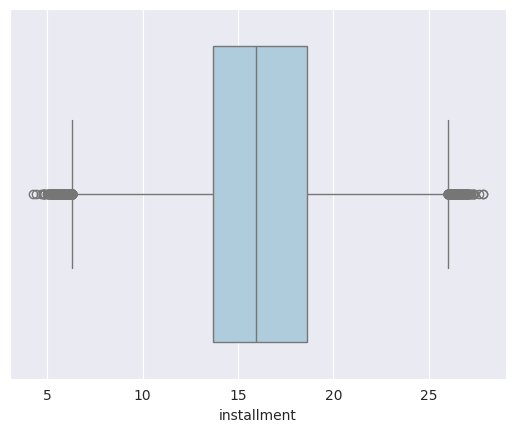

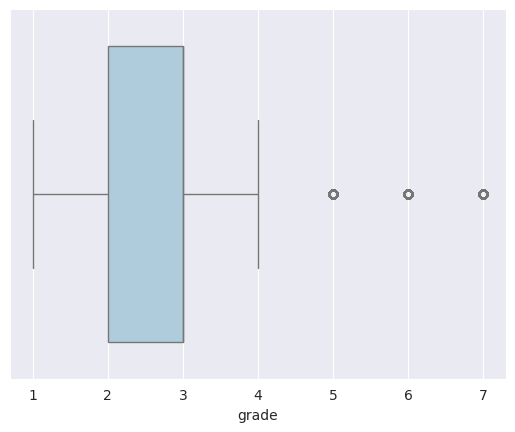

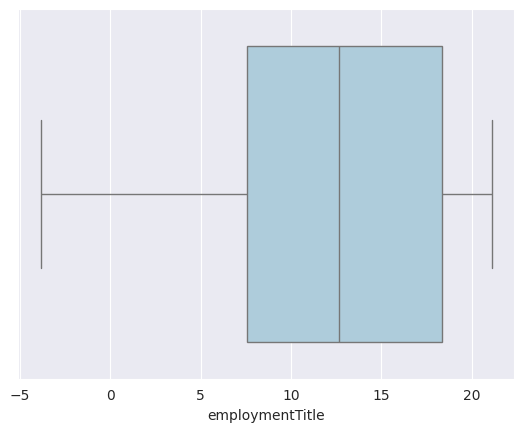

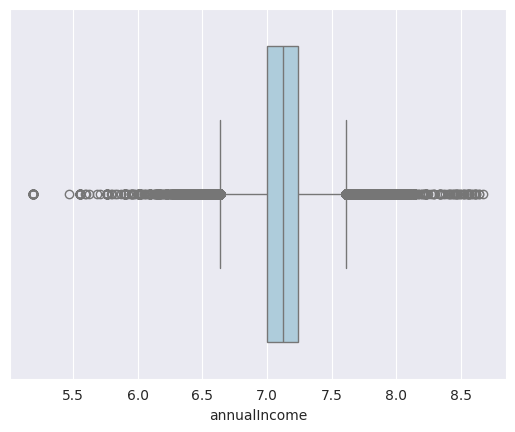

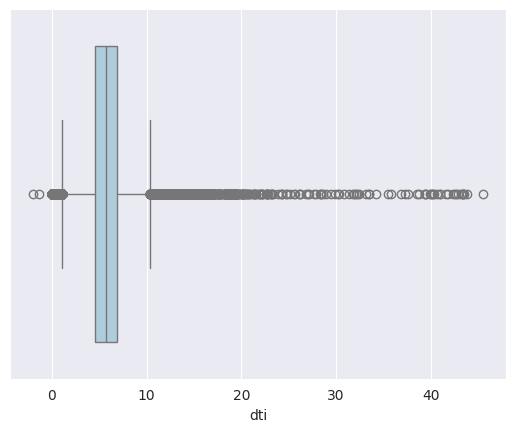

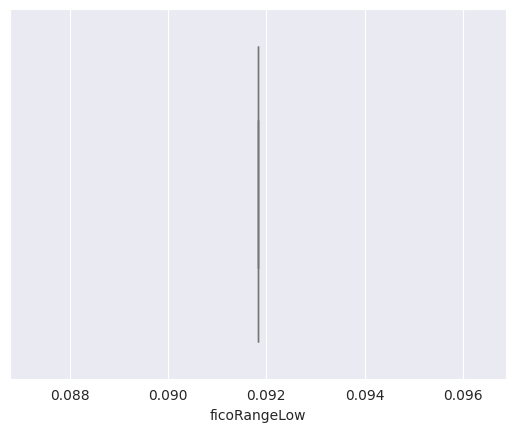

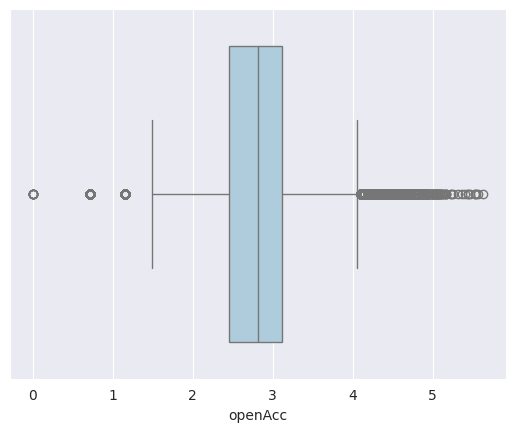

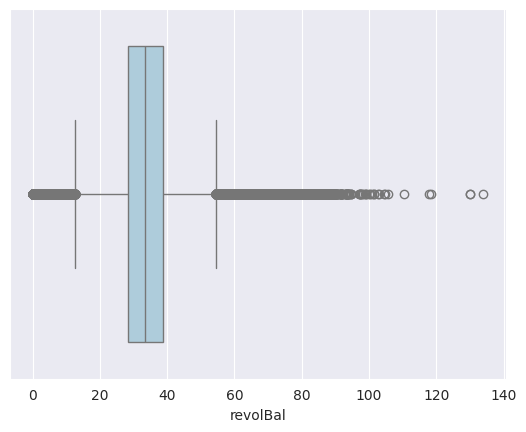

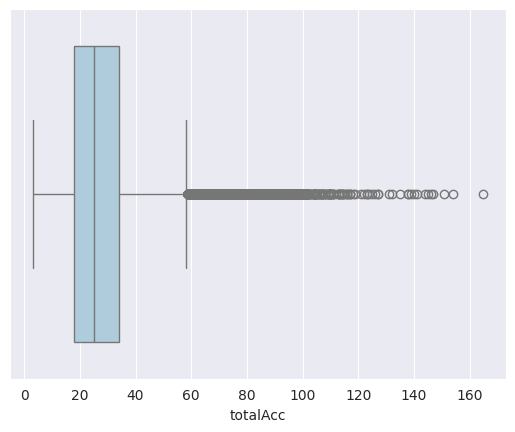

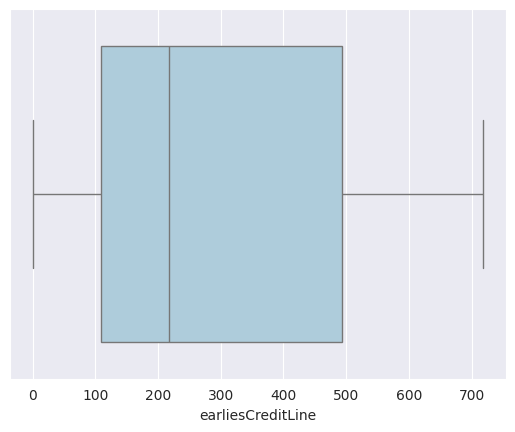

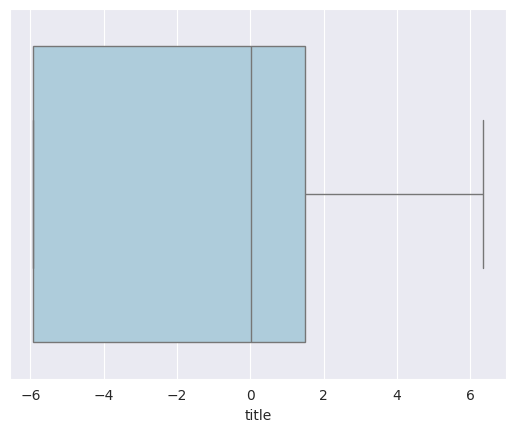

In [34]:
#Checking outliers

for col in numerical_features2:
    sns.boxplot(data=df,x=col)
    plt.show()

In [35]:
def find_outliers_by_3segama(data,fea):
    data_std = np.std(data[fea])
    data_mean = np.mean(data[fea])
    outliers_cut_off = data_std * 3
    lower_rule = data_mean - outliers_cut_off
    upper_rule = data_mean + outliers_cut_off
    data[fea+'_outliers'] = data[fea].apply(lambda x:str('outlier') if x > upper_rule or x < lower_rule else 'Normal')
    return data

In [36]:
data_train = df.copy()
for fea in numerical_features2:
    data_train = find_outliers_by_3segama(data_train,fea)
    print(data_train[fea+'_outliers'].value_counts())
    print(data_train.groupby(fea+'_outliers')['isDefault'].sum())
    print('*'*10)

loanAmnt_outliers
Normal     798863
outlier      1137
Name: count, dtype: int64
loanAmnt_outliers
Normal     159382
outlier       228
Name: isDefault, dtype: int64
**********
interestRate_outliers
Normal     792966
outlier      7034
Name: count, dtype: int64
interestRate_outliers
Normal     156169
outlier      3441
Name: isDefault, dtype: int64
**********
installment_outliers
Normal     799965
outlier        35
Name: count, dtype: int64
installment_outliers
Normal     159603
outlier         7
Name: isDefault, dtype: int64
**********
grade_outliers
Normal     794636
outlier      5364
Name: count, dtype: int64
grade_outliers
Normal     156944
outlier      2666
Name: isDefault, dtype: int64
**********
employmentTitle_outliers
Normal    800000
Name: count, dtype: int64
employmentTitle_outliers
Normal    159610
Name: isDefault, dtype: int64
**********
annualIncome_outliers
Normal     794068
outlier      5932
Name: count, dtype: int64
annualIncome_outliers
Normal     158524
outlier      1086

In [37]:
for fea in numerical_features2:
    data_train = data_train[data_train[fea+'_outliers']=='Normal']
    data_train = data_train.reset_index(drop=True)

# **Finalize and Splits**

***Finalize Dataset***

In [38]:
data_train.head(20)

loanAmnt  term  interestRate  installment  grade  employmentTitle  \
0      42000     1     21.674228    21.864605      5         7.162511   
1      23000     1     15.036774    17.708159      4        19.785719   
2      18000     1     17.850663    14.255145      4        15.521826   
3      12000     0      7.400815    15.067169      1        16.345784   
4       5000     0     15.688492     9.537131      3         4.528319   
5      16000     0      7.524079    16.003493      1        16.556472   
6       8000     0      8.555855     8.019224      1        19.329563   
7      17000     0     14.857497    15.489029      3        19.722343   
8      16000     0     13.162382    16.466705      3         6.385589   
9       7000     0     13.578768    12.485906      2        16.335768   
10      9000     0     27.254969    13.275079      5        18.776636   
11     23000     0     19.747625    19.921984      4        18.753072   
12     25000     0      8.924628    19.874697      2        11.822394   
13     18000     0      6.955738    18.561622      1        13.364332   
14     11000     0     11.381865    13.158392      2        20.128839   
15     12000     1     13.717979    14.139690      4        19.568933   
16      6000     0     10.849087    11.802582      2        17.553032   
17      7000     0     21.656880    13.617687      5        20.731635   
18     22000     1     20.508343    17.986235      5        20.189984   
19     17000     1     15.223672    14.954689      3        21.057942   

    annualIncome  isDefault       dti  ficoRangeLow  ...  grade_outliers  \
0       7.299804          1  4.770533       0.09183  ...          Normal   
1       7.015501          0  7.534152       0.09183  ...          Normal   
2       7.165032          0  6.952168       0.09183  ...          Normal   
3       7.324966          0  6.069421       0.09183  ...          Normal   
4       6.859418          0  8.344641       0.09183  ...          Normal   
5       6.912667          0  5.155086       0.09183  ...          Normal   
6       6.870704          0  5.550663       0.09183  ...          Normal   
7       6.870704          0  7.538073       0.09183  ...          Normal   
8       7.106925          1  5.117141       0.09183  ...          Normal   
9       6.922446          0  5.502951       0.09183  ...          Normal   
10      7.254384          0  8.697001       0.09183  ...          Normal   
11      7.227127          0  3.225973       0.09183  ...          Normal   
12      7.412254          0  2.742781       0.09183  ...          Normal   
13      7.050932          0  9.332787       0.09183  ...          Normal   
14      7.197488          0  5.919557       0.09183  ...          Normal   
15      7.064168          0  6.837914       0.09183  ...          Normal   
16      7.015501          1  6.188304       0.09183  ...          Normal   
17      6.967740          1  7.884575       0.09183  ...          Normal   
18      7.242970          0  5.015476       0.09183  ...          Normal   
19      7.174622          0  7.856122       0.09183  ...          Normal   

    employmentTitle_outliers  annualIncome_outliers  dti_outliers  \
0                     Normal                 Normal        Normal   
1                     Normal                 Normal        Normal   
2                     Normal                 Normal        Normal   
3                     Normal                 Normal        Normal   
4                     Normal                 Normal        Normal   
5                     Normal                 Normal        Normal   
6                     Normal                 Normal        Normal   
7                     Normal                 Normal        Normal   
8                     Normal                 Normal        Normal   
9                     Normal                 Normal        Normal   
10                    Normal                 Normal        Normal   
11                    Normal                 

In [39]:
dt=data_train.drop(['loanAmnt_outliers',
 'interestRate_outliers',
 'installment_outliers',
 'grade_outliers',
 'employmentTitle_outliers',
 'annualIncome_outliers',
 'dti_outliers',
 'ficoRangeLow_outliers',
 'openAcc_outliers',
 'revolBal_outliers',
 'totalAcc_outliers',
 'earliesCreditLine_outliers',
 'title_outliers'],axis=1)


In [40]:
dt=dt.sample(n = 1000, random_state=108)

In [41]:
dt

loanAmnt  term  interestRate  installment  grade  employmentTitle  \
596888     15000     0     13.039569    16.781155      2        20.226523   
293658     16000     0      8.581950    15.374928      1        17.738155   
598000     14000     1     17.755111    14.816282      4        18.225732   
321734     15000     0      7.560806    15.214595      1         0.717735   
103473     13000     0     21.499507    15.239163      5        11.164672   
...          ...   ...           ...          ...    ...              ...   
412141     25000     0      6.219322    18.934751      1         7.506185   
691887     15000     1     20.571249    15.538251      5        13.866586   
618015     37000     0      7.503335    22.122513      2         6.233412   
692903      9000     0     10.064262    12.145841      2        17.166967   
216269      9000     0      7.192100    10.843141      1        19.778433   

        annualIncome  isDefault       dti  ficoRangeLow   openAcc   revolBal  \
596888      7.165032          0  5.945196       0.09183  3.022050  45.622864   
293658      7.115445          0  6.310482       0.09183  2.822639  27.688715   
598000      7.076925          0  5.120035       0.09183  2.312637  30.822800   
321734      7.139820          0  5.191941       0.09183  2.822639  31.448956   
103473      6.892286          0  4.057429       0.09183  1.746881  21.645577   
...              ...        ...       ...           ...       ...        ...   
412141      7.155167          0  6.196912       0.09183  2.458651  36.777191   
691887      6.922446          0  5.063930       0.09183  2.711437  35.097874   
618015      7.231158          0  6.175613       0.09183  2.711437  44.021314   
692903      7.070604          0  7.231678       0.09183  2.925798  35.053856   
216269      7.095231          0  6.359690       0.09183  2.149175  30.553113   

        totalAcc  earliesCreditLine     title  
596888        23                 83  6.111654  
293658        24                 92  1.291182  
598000        16                 18 -5.940522  
321734        25                 95 -5.940522  
103473         5                 14 -5.940522  
...          ...                ...       ...  
412141        27                673 -5.940522  
691887        16                  7 -5.940522  
618015        26                578  1.291182  
692903        30                170  1.291182  
216269        28                439  1.039875  

[1000 rows x 15 columns]

In [42]:
# Split Predictors
x = dt.drop(['isDefault'],axis=1)
y = dt['isDefault']

In [43]:

x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=999)

In [44]:
y_test

508458    0
482888    0
478143    0
333136    0
679312    0
         ..
476674    0
741987    0
178175    0
34844     0
350409    0
Name: isDefault, Length: 200, dtype: int64

***SMOTE***

In [45]:
# SMOTE (oversampling)
import numpy as np
from numpy import mean
from numpy import std
import imblearn                                                      # Import the imblearn package. sklearn does not feature SMOTE
from imblearn.over_sampling import SMOTE                             # Import SMOTE

sm = SMOTE(random_state=12346)                                       # Create an instance of SMOTE
x_train_SMOTE, y_train_SMOTE = sm.fit_resample(x_train, y_train)     # Apply the SNOTE intance to the training data

print("Shape before SMOTE: ", x_train.shape, y_train.shape)          # Verify the shape has changed and is now balanced.
print("Shape after SMOTE: ", x_train_SMOTE.shape, y_train_SMOTE.shape)
print("Mean of target: ",mean(y_train_SMOTE))

Shape before SMOTE:  (800, 14) (800,)
Shape after SMOTE:  (1280, 14) (1280,)
Mean of target:  0.5


In [46]:
x_train=x_train_SMOTE
y_train=y_train_SMOTE

# **Pycaret  Low-Code**

In [47]:
from pycaret.classification import setup
from pycaret.classification import tune_model
from pycaret.classification import setup
from pycaret.classification import compare_models
from pycaret.classification import *


In [48]:
import sklearn                                          # Sci-Kit Learn library (most important machine learning library in Python)
from sklearn import datasets                            # Imports some toy daatsets embedded in the sklean library
from sklearn.preprocessing import StandardScaler        # Used to standardize a column of data (i.e., create z scores)
from sklearn.linear_model import Perceptron             # Implementation of the Perceptron algorithm in sklearn
from sklearn.metrics import accuracy_score              # Used to compute the accuracy of a machine learning classifier
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [50]:
dt1=dt.sample(n = 1000, random_state=108)

In [51]:
# Split Predictors
x1 = dt1.drop(['isDefault'],axis=1)
y1 = dt1['isDefault']

In [52]:

x1_train, x1_test,y1_train,y1_test = train_test_split(x1,y1, test_size=0.2, random_state=999)

In [53]:
# SMOTE (oversampling)
import numpy as np
from numpy import mean
from numpy import std
import imblearn                                                      # Import the imblearn package. sklearn does not feature SMOTE
from imblearn.over_sampling import SMOTE                             # Import SMOTE

sm = SMOTE(random_state=12346)                                       # Create an instance of SMOTE
x1_train_SMOTE, y1_train_SMOTE = sm.fit_resample(x1_train, y1_train)     # Apply the SNOTE intance to the training data

print("Shape before SMOTE: ", x1_train.shape, y1_train.shape)          # Verify the shape has changed and is now balanced.
print("Shape after SMOTE: ", x1_train_SMOTE.shape, y1_train_SMOTE.shape)
print("Mean of target: ",mean(y1_train_SMOTE))

Shape before SMOTE:  (800, 14) (800,)
Shape after SMOTE:  (1294, 14) (1294,)
Mean of target:  0.5


In [54]:
# Feature Importance
# Load your dataset and split into features (X) and target (y)
x1_train=x1_train_SMOTE
y1_train=y1_train_SMOTE

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier()

# Train the model on your dataset
rfc.fit(x1_train, y1_train)

# Extract feature importances from the model
importances = rfc.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

Text(0.5, 1.0, 'Feature importance for classification dataset')

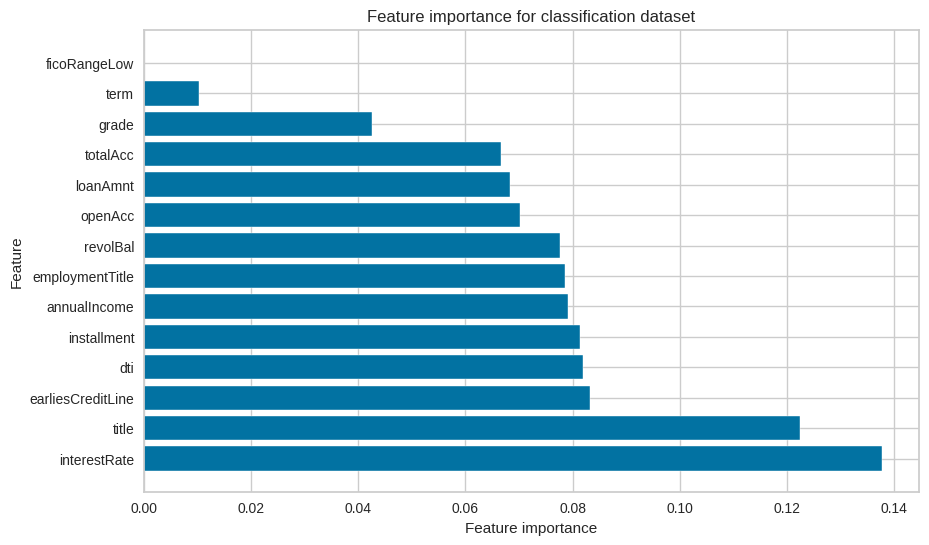

In [55]:
# Create a bar chart of feature importances
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.barh(range(x1_train.shape[1]), importances[indices], align='center')
plt.yticks(range(x1_train.shape[1]), x1_train.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature importance for classification dataset")

In [56]:
# Balance of the dataset
y1_train.mean()

0.5

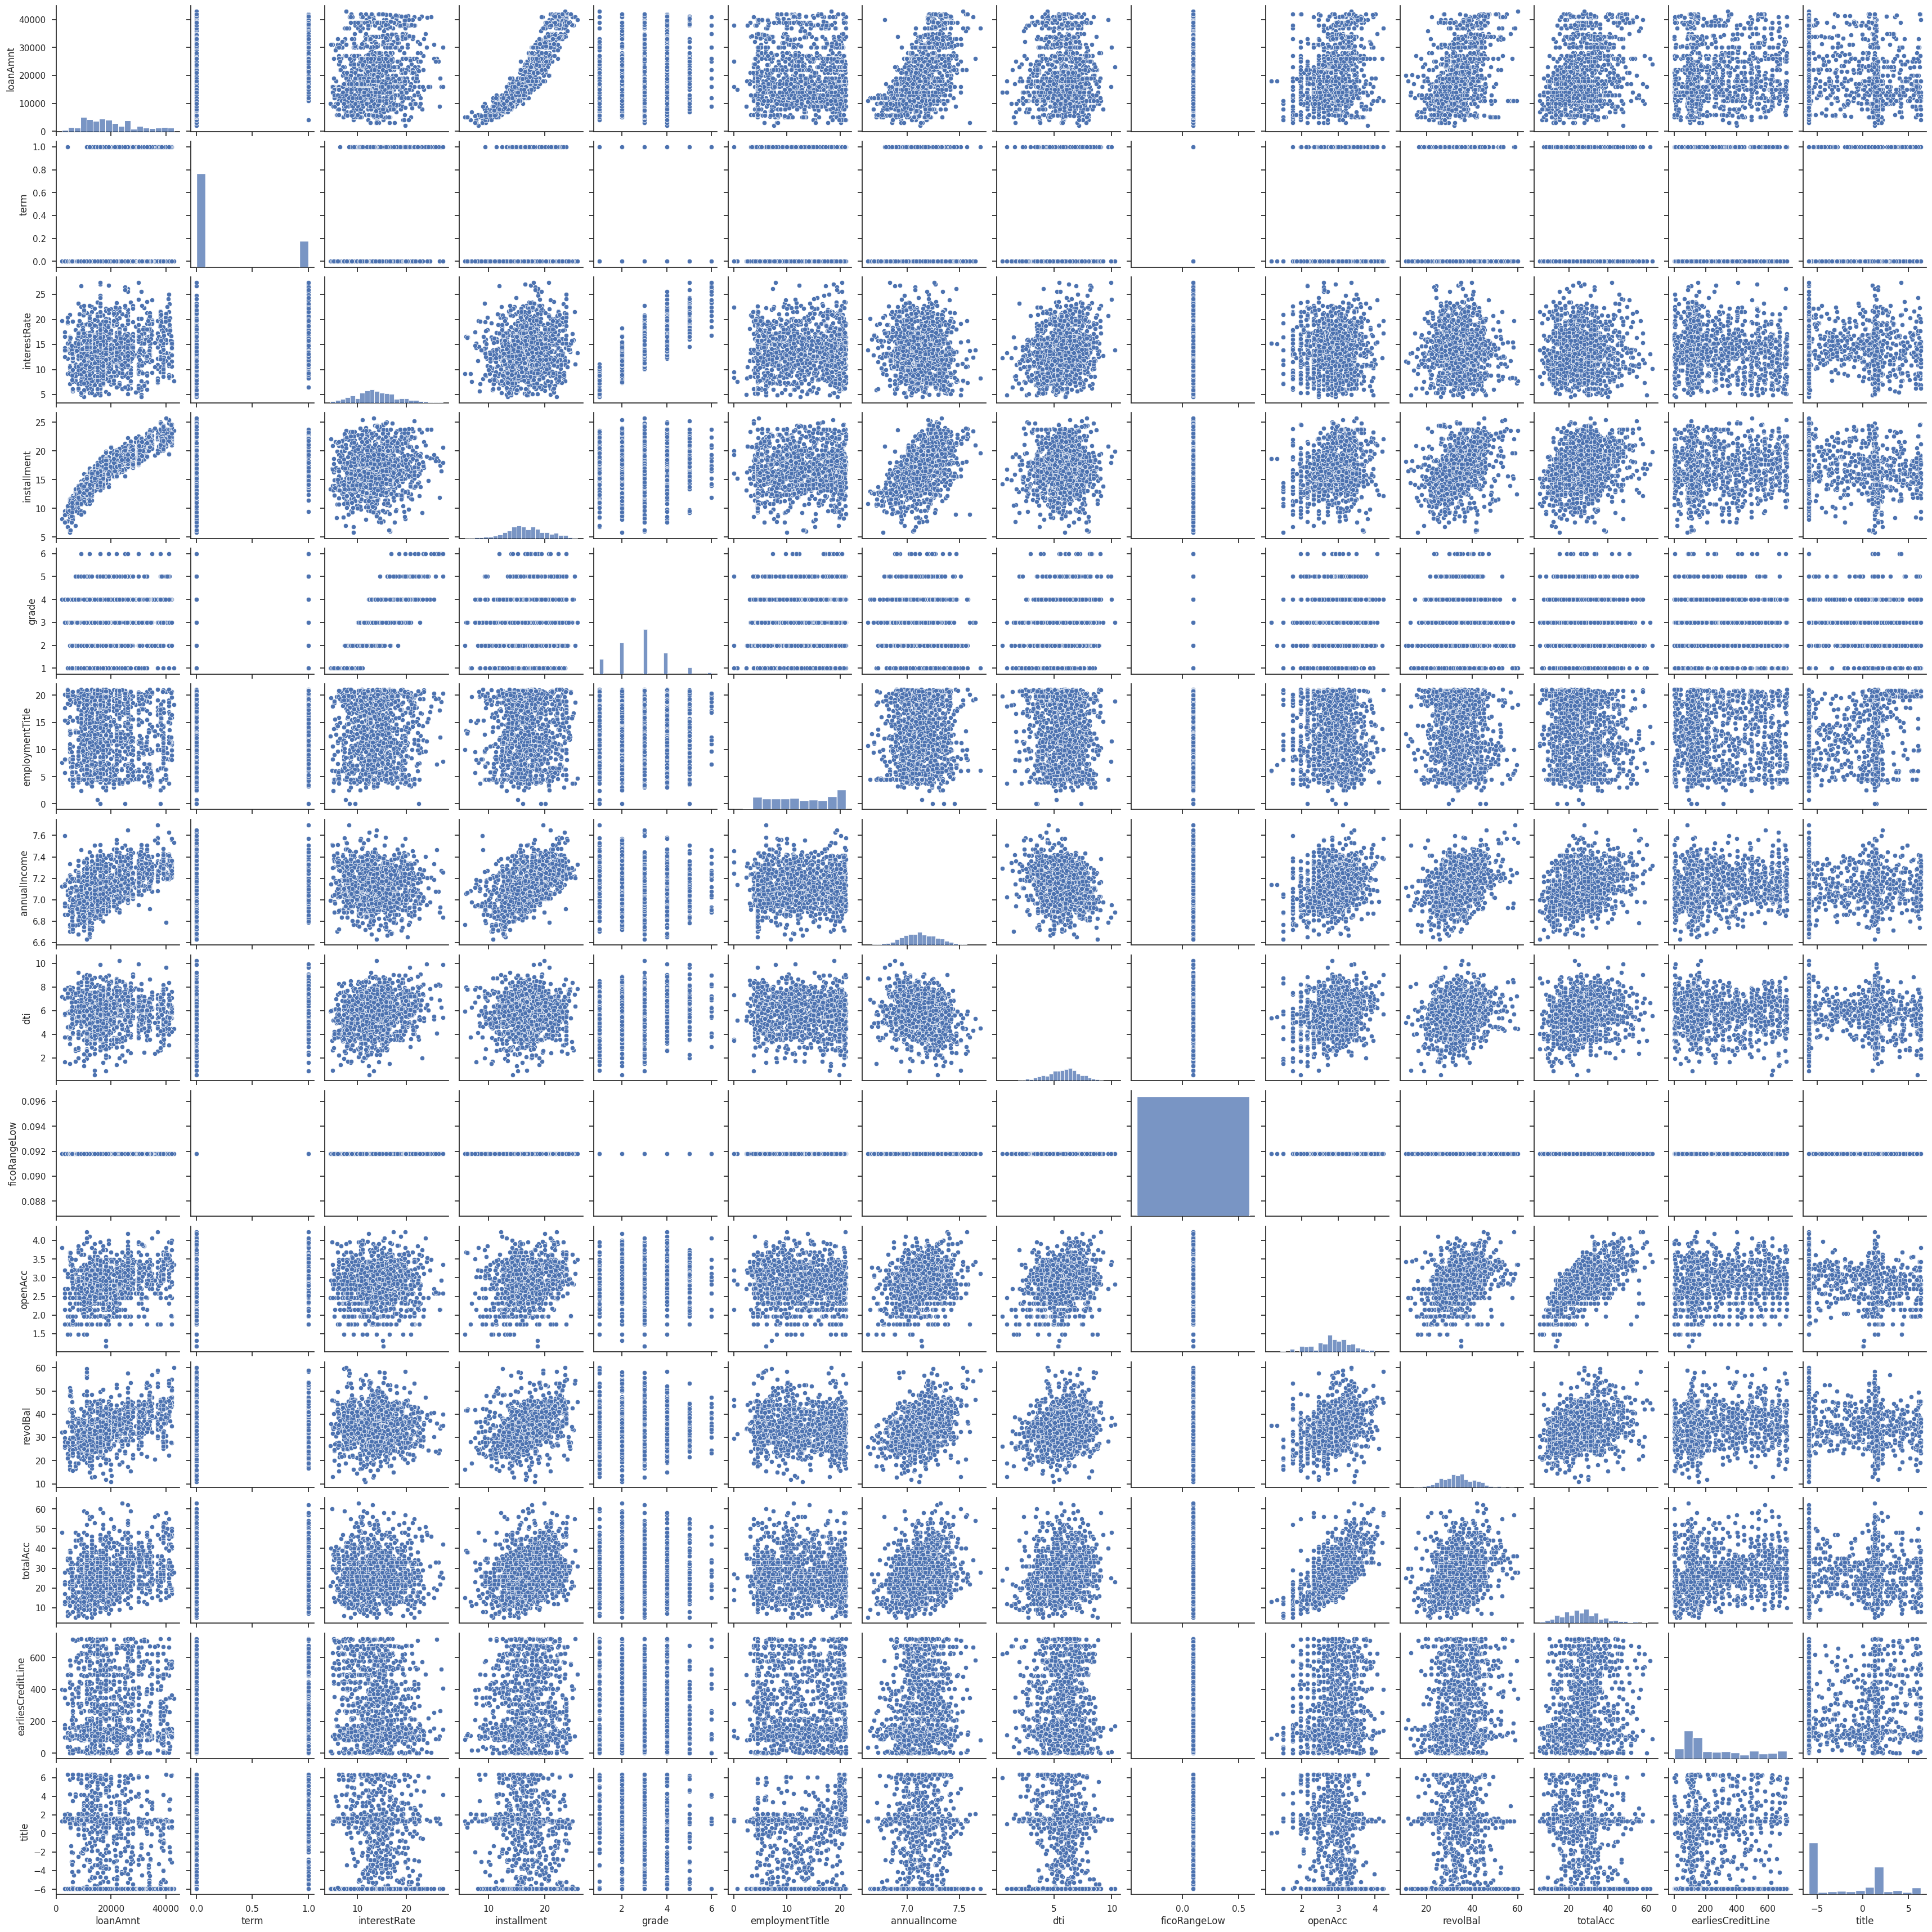

In [ ]:
# Scatterplot matrix - these can take some time to gerenerate if the number of features is large
sns.set_theme(style="ticks")
sns.pairplot(x1_train)

##*Principal Components Analysis (PCA)*

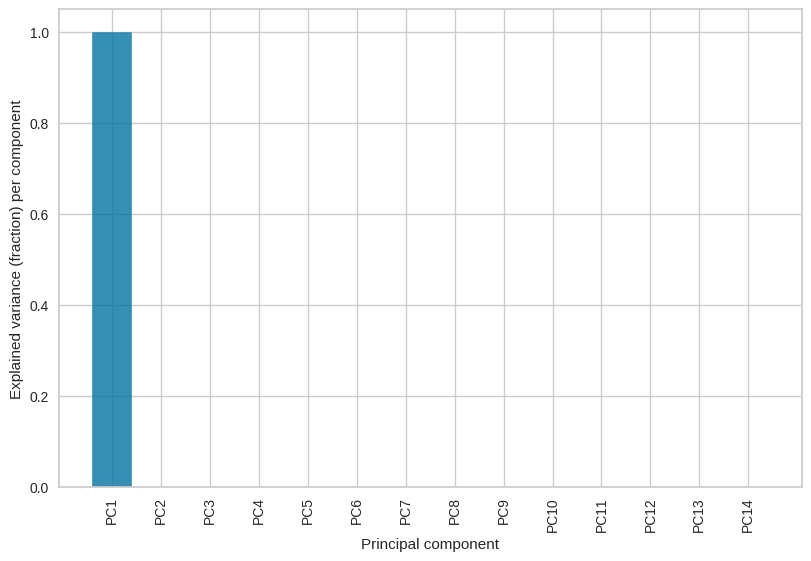

In [57]:
# Principal Components Analysis
# Examine the explained variance ratio in order for each components
pca = PCA()
X_winsorized_pca = pca.fit_transform(x1_train)
pca.explained_variance_ratio_

pca_explained_variance_bar(pca, alpha=0.8)
plt.show()

# This suggests that we may be able to use one PC to build models

In [58]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
_ = rfe.fit(x1_train,y1_train)
print('Important Features\n',x1_train.columns[rfe.support_])
rf = RandomForestClassifier()
_ = rf.fit(rfe.transform(x1_test), y1_test)
print("\n Accuracy: ",rf.score(rfe.transform(x1_test), y1_test))

Important Features
 Index(['interestRate', 'installment', 'dti', 'earliesCreditLine', 'title'], dtype='object')

 Accuracy:  1.0


In [59]:
grid = setup(data=dt1, target=dt1.columns[7], verbose=True)
best = compare_models()
print(best)

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6803, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [60]:
# Tune best PyCaret model
# Tune model hyperparameters
best = tune_model(LinearDiscriminantAnalysis(), n_iter=200, choose_better=True)  # Change the algorithm to whatever one wins the horse race!

# Report the best model
print(best)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 36 candidates, totalling 360 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


In [61]:
# Fit PyCaret classifier on training data
pycaret_clf = best.fit(x1_train, y1_train)

# Predict target values for test data
y1_hat = pycaret_clf.predict(x1_test)
y1_hat=pd.DataFrame(y1_hat)
cm = confusion_matrix(y1_test, y1_hat)
accuracy =  (cm[0,0] + cm[1,1])/( cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
print("Confusion matrix\n",cm, "\n\nAccuracy = ",accuracy)

Confusion matrix
 [[108  54]
 [ 22  16]] 

Accuracy =  0.62


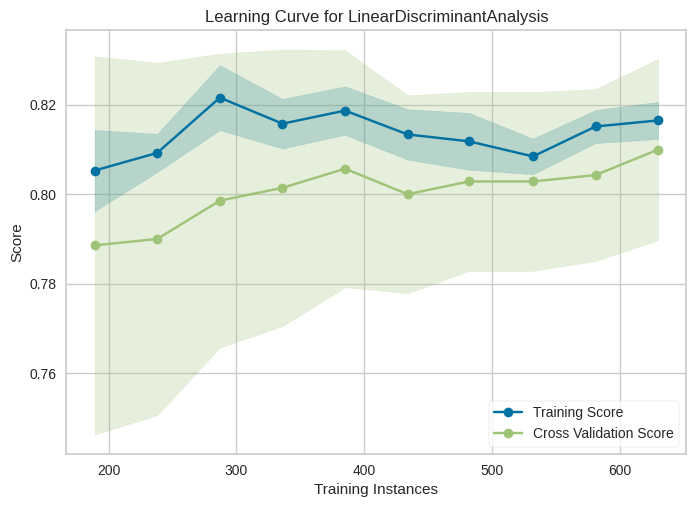

In [62]:
plot_model(best, plot = 'learning')


              Feature  Importance
2        interestRate      0.0750
5     employmentTitle      0.0335
11           totalAcc      0.0300
4               grade      0.0280
6        annualIncome      0.0280
0            loanAmnt      0.0230
9             openAcc      0.0070
13              title      0.0065
1                term      0.0030
12  earliesCreditLine      0.0020
7                 dti      0.0000
8        ficoRangeLow      0.0000
3         installment     -0.0005
10           revolBal     -0.0100


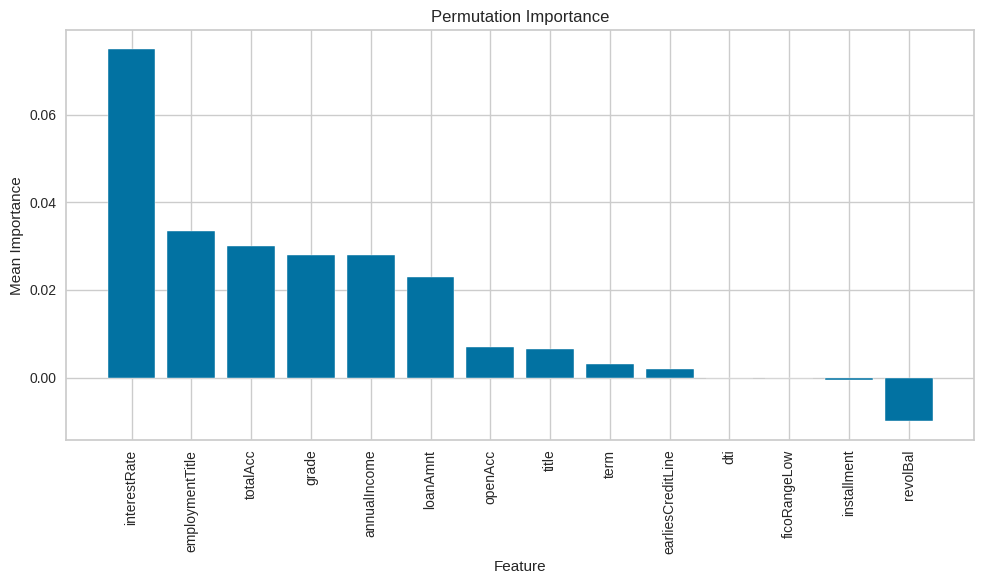

In [63]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Compute permutation importance on the test set
perm_results = permutation_importance(best, x1_test, y1_test, n_repeats=10, random_state=42)

# Create a DataFrame with the feature names and their importance
perm_importance = pd.DataFrame({
    'Feature': x1_test.columns,
    'Importance': perm_results.importances_mean
}).sort_values(by='Importance', ascending=False)

print(perm_importance)

# Plot the permutation importances
plt.figure(figsize=(10, 6))
plt.bar(perm_importance['Feature'], perm_importance['Importance'])
plt.xticks(rotation=90)
plt.title("Permutation Importance")
plt.xlabel("Feature")
plt.ylabel("Mean Importance")
plt.tight_layout()
plt.show()


In [64]:
import shap
import numpy as np

# Initialize JS visualization (for notebooks)
shap.initjs()

# Define a custom function that returns only the probability of the positive class ('Churn')
def predict_proba_churn(data):
    return best.predict_proba(data)[:, 1]

# Use a subsample of the training data as the background dataset for KernelExplainer.
background = x1_train.sample(n=100, random_state=42)

# Create the KernelExplainer using the custom prediction function
explainer = shap.KernelExplainer(predict_proba_churn, background)

# Compute SHAP values for the test set.
# The nsamples parameter controls the number of samples used to estimate the SHAP values.
shap_values = explainer.shap_values(x1_test, nsamples=100)

  0%|          | 0/200 [00:00<?, ?it/s]

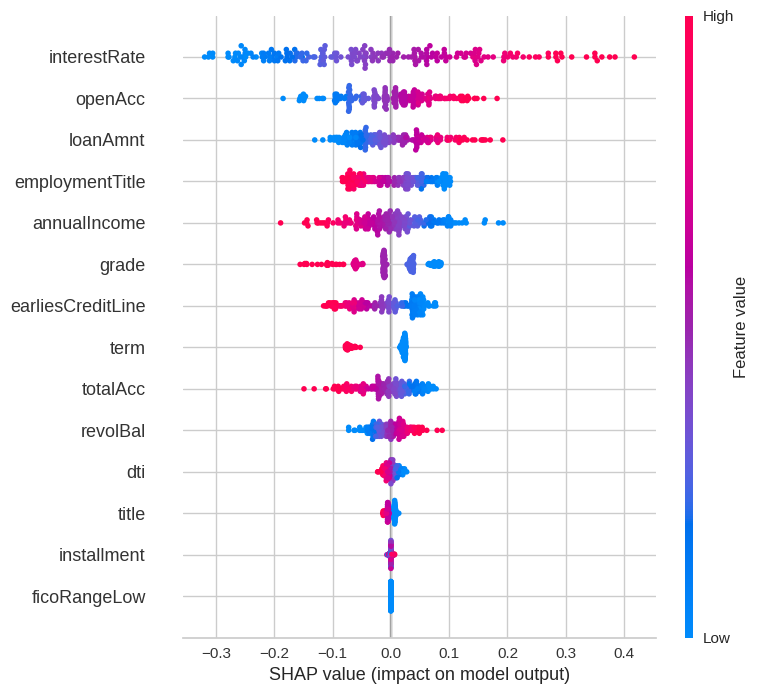

In [65]:
# Plot the SHAP summary plot. Now shap_values is an array with shape (n_samples, n_features)
shap.summary_plot(shap_values, x1_test)

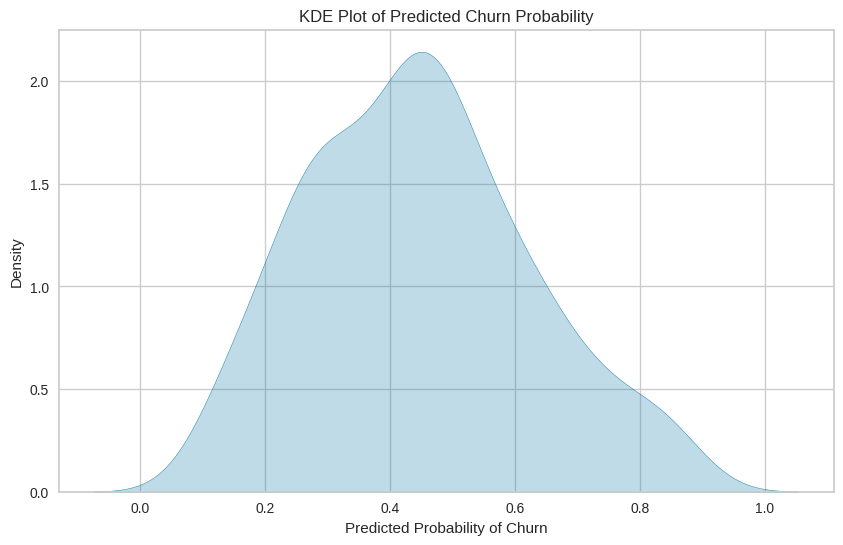

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive (churn) class
churn_probs = best.predict_proba(x1_test)[:, 1]

plt.figure(figsize=(10, 6))
sns.kdeplot(churn_probs, shade=True)
plt.title("KDE Plot of Predicted Churn Probability")
plt.xlabel("Predicted Probability of Churn")
plt.ylabel("Density")
plt.show()


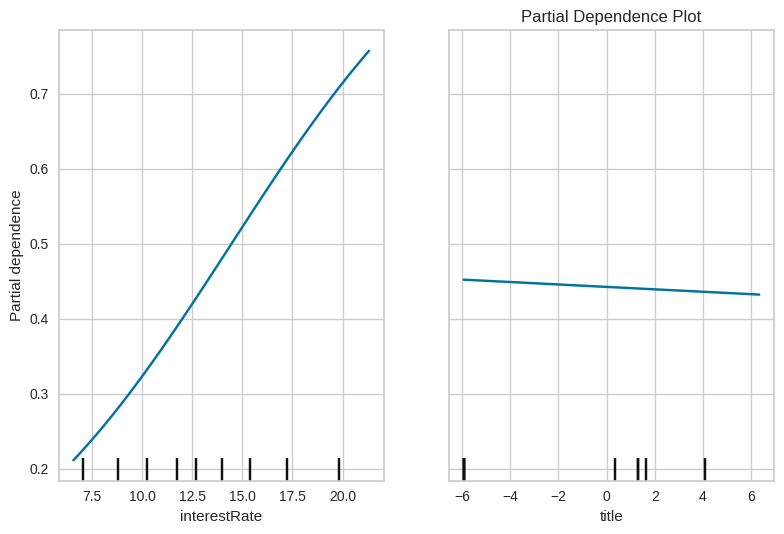

In [67]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features_to_plot = ['interestRate', 'title']

# Create the partial dependence plot
PartialDependenceDisplay.from_estimator(best, x1_test, features_to_plot, kind="average", grid_resolution=50)
plt.title("Partial Dependence Plot")
plt.tight_layout()
plt.show()


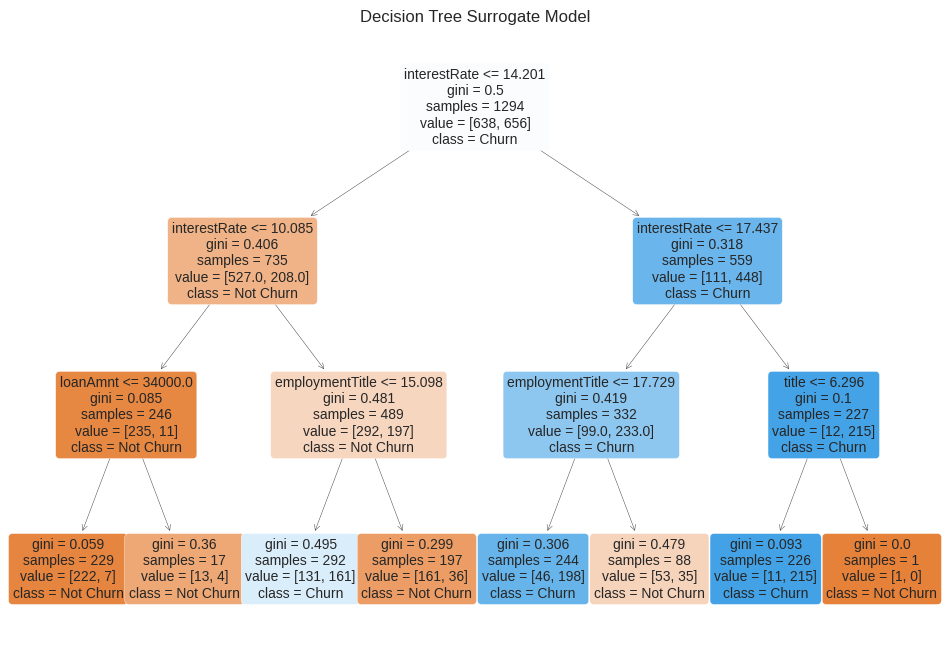

In [68]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Get the black-box model's predictions on the training data
y_pred_train = best.predict(x1_train)

# Fit a surrogate decision tree (set max_depth to a low value for interpretability)
tree_surrogate = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_surrogate.fit(x1_train, y_pred_train)

# Plot the decision tree surrogate
plt.figure(figsize=(12, 8))
plot_tree(
    tree_surrogate,
    feature_names=x1_train.columns,
    class_names=['Not Churn', 'Churn'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Surrogate Model")
plt.show()


In [97]:
from lightgbm import LGBMClassifier

# One new model (Benchmark modeling)
from sklearn.linear_model import LogisticRegression
baseline_model = LogisticRegression()
baseline_model.fit(x_train, y_train)
baseline_accuracy = accuracy_score(y_test, baseline_model.predict(x_test))
print("Baseline Logistic Regression Accuracy:", baseline_accuracy)

# LightGBM + Grid Search
param_grid_lgb = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10]
}

lgb_model = LGBMClassifier()

grid_search_lgb = GridSearchCV(lgb_model, param_grid_lgb, cv=5, scoring='accuracy')
grid_search_lgb.fit(x_train, y_train)

best_lgb_grid = grid_search_lgb.best_estimator_
best_lgb_grid_accuracy = accuracy_score(y_test, best_lgb_grid.predict(x_test))
print("Optimized LightGBM (Grid Search) Accuracy:", best_lgb_grid_accuracy)
print("Best Grid Search Parameters:", grid_search_lgb.best_params_)

# LightGBM + Random Search
param_dist_lgb = {
    'n_estimators': np.arange(50, 300, 50),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': [3, 5, 7, 10]
}

random_search_lgb = RandomizedSearchCV(
    lgb_model,
    param_distributions=param_dist_lgb,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=999,
    n_jobs=-1
)

random_search_lgb.fit(x_train, y_train)

best_lgb_random = random_search_lgb.best_estimator_
best_lgb_random_accuracy = accuracy_score(y_test, best_lgb_random.predict(x_test))
print("Optimized LightGBM (Random Search) Accuracy:", best_lgb_random_accuracy)
print("Best Random Search Parameters:", random_search_lgb.best_params_)

# Select the Best LightGBM Model
if best_lgb_grid_accuracy > best_lgb_random_accuracy:
    final_model = best_lgb_grid
    final_accuracy = best_lgb_grid_accuracy
    best_params = grid_search_lgb.best_params_
    model_type = "Grid Search"
else:
    final_model = best_lgb_random
    final_accuracy = best_lgb_random_accuracy
    best_params = random_search_lgb.best_params_
    model_type = "Random Search"

print(f"Final Best LightGBM Model (from {model_type})")
print("Final Model Accuracy:", final_accuracy)
print("Final Model Best Parameters:", best_params)

流式输出内容被截断，只能显示最后 5000 行内容。
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [102]:
# Get feature importance rankings
feature_importance = permutation_importance(final_model, x_test, y_test, n_repeats=10, random_state=999)
sorted_idx = np.argsort(feature_importance.importances_mean)[::-1]

# Select the first two most important features
top_features = [x_train.columns[sorted_idx[0]], x_train.columns[sorted_idx[1]]]
print(top_features)

['interestRate', 'employmentTitle']


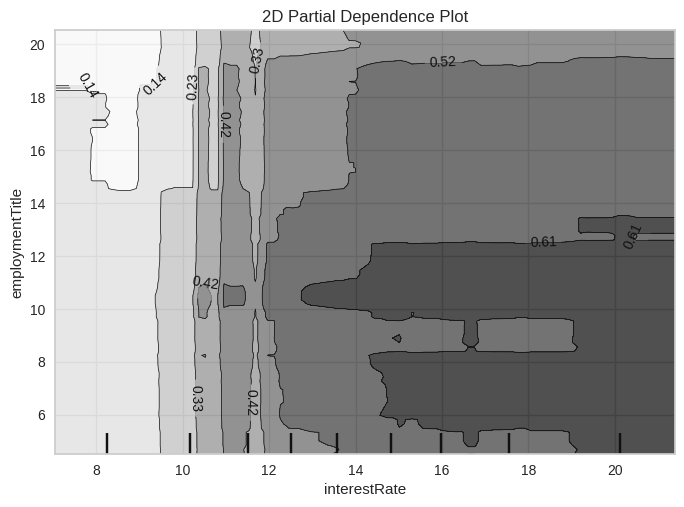

In [103]:
# 2D PDP, LIME, Anchor method, ICE Plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# choose 2 feactures
features = [("interestRate", "employmentTitle")]


fig, ax = plt.subplots()
PartialDependenceDisplay.from_estimator(best_lgb_random, x_train, features=features, ax=ax)
plt.title("2D Partial Dependence Plot")
plt.show()

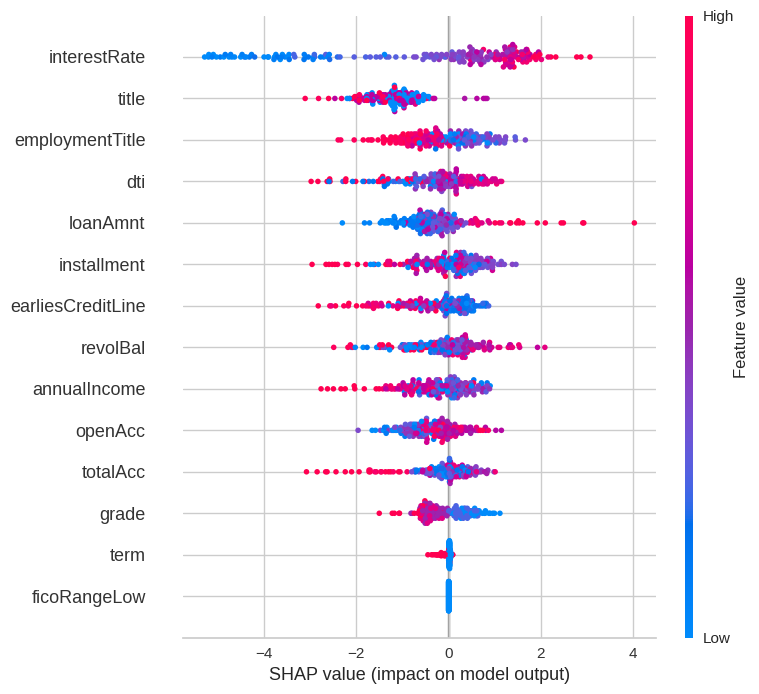

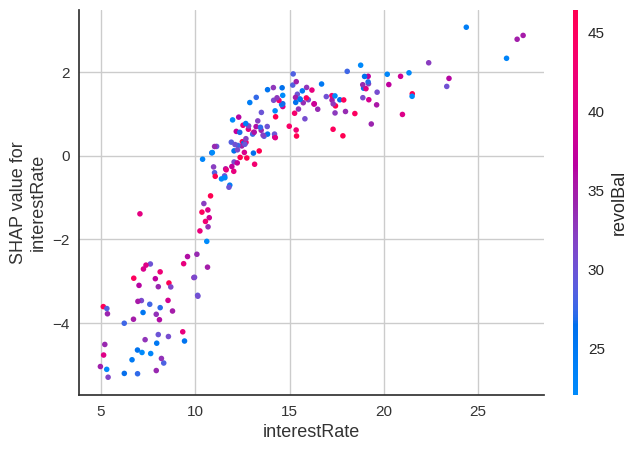

In [104]:
explainer = shap.Explainer(final_model, x_train)
shap_values = explainer(x_test)

# Drawing a brief plot for SHAP
shap.summary_plot(shap_values, x_test)

# Plot SHAP Dependence Plot (using one of the most important features as an example)
top_feature = x_train.columns[np.argmax(np.abs(shap_values.values).mean(axis=0))]
shap.dependence_plot(top_feature, shap_values.values, x_test)

# Plotting SHAP Force Plot (interpreting individual samples)
shap.initjs()
sample_idx = 0
shap.force_plot(explainer.expected_value, shap_values[sample_idx].values, x_test.iloc[sample_idx])

In [108]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=18a1fea78d921d157b1e9f1fbd86f9d713368888f9d5bd41d473dea22b320191
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [109]:
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt

# Creating the LIME Interpreter
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns.tolist(),
    class_names=['No Default', 'Default'],
    mode='classification'
)

# Select a test sample for interpretation
sample_idx = 0  # This index can be modified to see different interpretations of the results
sample_instance = x_test.iloc[sample_idx].values

# Generate LIME Explanation
lime_exp = lime_explainer.explain_instance(sample_instance, final_model.predict_proba)

# Plotting of LIME interpretations
lime_exp.show_in_notebook()

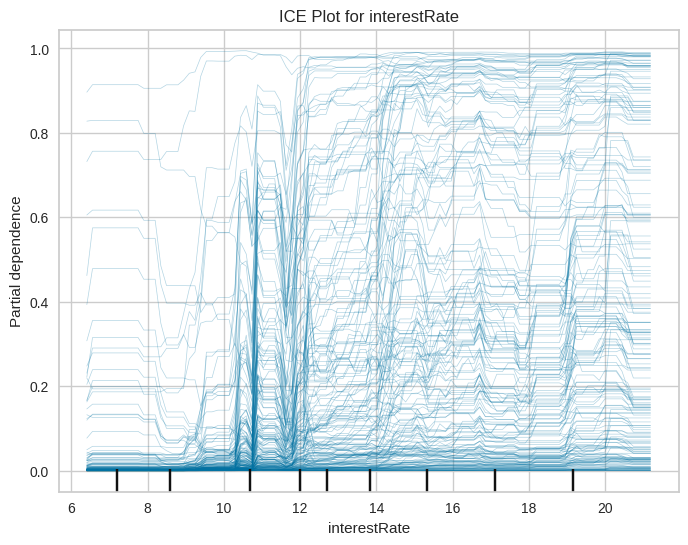

In [111]:
# Replace feature_names with x_train.columns to access the feature names
top_feature1 = x_train.columns[sorted_idx[0]]

# 绘制 ICE (Individual Conditional Expectation) Plot
fig, ax = plt.subplots(figsize=(8, 6))
pdp = PartialDependenceDisplay.from_estimator(
    final_model, x_test, [top_feature1], kind="individual", ax=ax
)
ax.set_title(f"ICE Plot for {top_feature1}")
plt.show()

In [112]:
x_train.head()

loanAmnt  term  interestRate  installment  grade  employmentTitle  \
0     31000     1     21.341228    19.661919      4         4.528319   
1     20000     0      8.655603    16.570424      1         6.703191   
2     15000     0     14.276249    14.228748      3        19.944887   
3     30000     0      6.542455    20.829277      1        11.736101   
4     41000     0      8.617659    22.611565      2        21.078529   

   annualIncome       dti  ficoRangeLow   openAcc   revolBal  totalAcc  \
0      7.134549  6.396524       0.09183  2.711437  23.890476        31   
1      7.330969  6.811807       0.09183  3.685645  35.755819        55   
2      6.902619  7.590390       0.09183  2.590739  31.269886        32   
3      7.160135  8.257723       0.09183  3.197302  32.930970        44   
4      7.375428  4.489365       0.09183  3.022050  53.327438        30   

   earliesCreditLine     title  
0                129 -5.940522  
1                539 -5.940522  
2                309  4.801267  
3                716  1.291182  
4                719  1.291182

In [113]:
## Task 4


# Set thresholds to include users with lower (below median) annual incomes as a cohort
income_threshold = x_train['annualIncome'].median()
low_income_group = x_test['annualIncome'] < income_threshold
high_income_group = ~low_income_group

# Calculate loan approval rates for different income groups (assuming that a target variable y_test of 1 means that the loan was approved)
approval_rate_low_income = y_test[low_income_group].mean()
approval_rate_high_income = y_test[high_income_group].mean()

# Calculation of Disparate Impact Ratio (low income group approval rate / high income group approval rate)
disparate_impact = approval_rate_low_income / approval_rate_high_income

# Calculation of Demographic Parity (difference in approval rates of the two groups)
demographic_parity = approval_rate_high_income - approval_rate_low_income

# Output fairness indicators
{
    "Approval Rate (Low Income)": approval_rate_low_income,
    "Approval Rate (High Income)": approval_rate_high_income,
    "Disparate Impact Ratio": disparate_impact,
    "Demographic Parity": demographic_parity
}

{'Approval Rate (Low Income)': 0.1717171717171717,
 'Approval Rate (High Income)': 0.13861386138613863,
 'Disparate Impact Ratio': 1.2388167388167386,
 'Demographic Parity': -0.03310331033103309}

In [114]:
## Task 5
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


y_pred = final_model.predict(x_test)
y_pred_proba = final_model.predict_proba(x_test)[:, 1]

model_performance = {
    "AUC": roc_auc_score(y_test, y_pred_proba),
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-score": f1_score(y_test, y_pred)
}

print(model_performance)



# AUC = 0.69 → The model has some ability to differentiate, but there is still room for improvement.
# Accuracy = 0.795 → The overall accuracy of the forecast is high.
# Precision = 0.3437 → The precision of predicting defaults is low.
# Recall = 0.3548 → A low percentage of defaulting customers are identified.
# F1-score = 0.3492 → The balance between Precision and Recall is average.

{'AUC': 0.6903989310937202, 'Accuracy': 0.795, 'Precision': 0.34375, 'Recall': 0.3548387096774194, 'F1-score': 0.3492063492063492}
